# Key points:


*   Удалили строки с lot_price == 0
*   lot_price = log(lot_price)
*   Удаляем почти полностью пустые лоты - их там очень мало
*   Удалим lot_name (много пропусков), okpd2_names (useless), что-то из add_code/add_code_names (useless)
*   time -> pandas.to_datetime
*   Удалили мусорные фичи
*   okpd2_code = additional_code (если okpd2_code == NaN)



# Analysis + Preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [77]:
train_data = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\train_comp.csv", sep=';')
train_data.head()

c:\users\timofey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  from urllib import urlopen


,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,NaN,480000.0,43.2,Работы по противопожарной защите,NaN,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,NaN,202860.0,27.4,"Светильники и устройства осветительные прочие,...",NaN,NaN,Светильник
2,pn_lot_9971596,223fz,33,2019-02-25,Поставка дизельного топлива ЕВРО сорт Е вид III,Поставка дизельного топлива ЕВРО сорт Е вид III,1220780.0,19.2,Нефтепродукты,19.2,Производство нефтепродуктов,NaN
3,pn_lot_5898610,44fz,27,2019-10-25,Услуги (работы) в области защиты информации Ат...,NaN,200000.0,74.9,Услуги (работы) в области защиты информации,NaN,NaN,Услуги (работы) в области защиты информации
4,pn_lot_2843527,44fz,24,2020-03-25,Поставка изделий медицинского назначения (вата...,NaN,53640.0,NaN,NaN,21.2,"Рулон ватный, нестерильный","Рулон ватный, нестерильный"


In [ ]:
xs = list(set(np.around(2 * np.log(train_data['lot_price'].dropna() + 1))))
ys = np.array([sum(np.around(2 * np.log(train_data['lot_price'].dropna() + 1)) == i) for i in xs])
ys

array([  782,    21,     1,     1,     1,     2,     3,    14,     9,
          19,    14,    14,    49,   105,   303,   726,  1655,  4035,
        8327, 15801, 26567, 40749, 58264, 79029, 84710, 88138, 95887,
       69724, 59861, 45211, 35415, 22246, 16746,  8951,  5900,  4209,
        1984,  1318,   865,   515,   333,   214,    86,    47,    22,
          12,     8,     5,     1,     2])

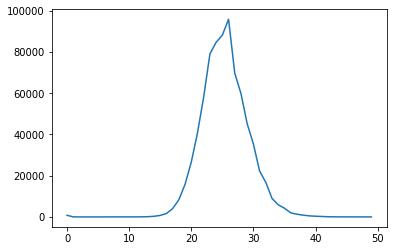

In [ ]:
plt.plot(xs, ys) # logged

In [ ]:
xs_ = list(set(np.around((train_data['lot_price'].dropna() + 1) / 1000000)))
ys_ = np.array([sum(np.around((train_data['lot_price'].dropna() + 1) / 1000000) == i) for i in xs_])
ys_

array([485418, 145746,  46926,  27373,  13317,  10166,   6496,   5475,
         4230,   3685,   3794,   1955,   1696,   1374,   1330,   1351,
          992,    941,    848,    738,    891,    548,    520,    527,
          426,    521,    370,    344,    362,    343,    422,    263,
          282,    285,    238,    278,    219,    225,    218,    186,
          267,    168,    172,    174,    154,    197,    171,    156,
          170,    215,    269,     82,     90,     81,     88,     88,
           89,     65,     68,     71,     86,     49,     60,     62,
           66,     69,     62,     46,     40,     55,     69,     55,
           47,     53,     47,     48,     57,     46,     47,     40,
           62,     34,     43,     46,     40,     48,     25,     41,
           38,     28,     45,     31,     31,     33,     36,     28,
           31,     30,     42,     38,     49,     23,     32,     22,
           17,     26,     27,     22,     29,     31,     24,     13,
      

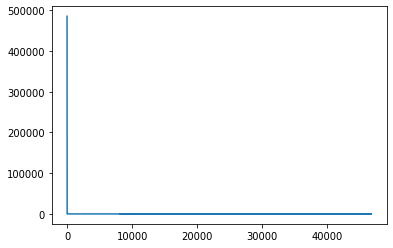

In [ ]:
plt.plot(xs_, ys_)

In [78]:
train_data['lot_price'] = train_data['lot_price'] + 1
train_data.head(2)

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,NaN,480001.0,43.2,Работы по противопожарной защите,NaN,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,NaN,202861.0,27.4,"Светильники и устройства осветительные прочие,...",NaN,NaN,Светильник


In [79]:
train_data['lot_price'] = train_data['lot_price'].apply(np.log)
train_data.head(2)

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,NaN,13.081543,43.2,Работы по противопожарной защите,NaN,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,NaN,12.220276,27.4,"Светильники и устройства осветительные прочие,...",NaN,NaN,Светильник


In [63]:
def nan_stats(name, data=train_data):
    print(name + ' NaN:', sum(data[name].isna()))
    print(name + ' not NaN:', len(data[name]) - sum(data[name].isna()))
    print(name + ' NaN percentage:', (sum(data[name].isna() / len(data[name])) * 100))

In [ ]:
nan_stats('lot_name')

lot_name NaN: 0
lot_name not NaN: 778121
lot_name NaN percentage: 0.0


83% NaN -- Не думаю, что этот признак слишком информативный с таким количеством пропусков.

In [ ]:
nan_stats('additional_code')
print('now with 223fz')
nan_stats('additional_code', train_data[train_data['fz'] == '223fz'])
print('now with 44fz')
nan_stats('additional_code', train_data[train_data['fz'] == '44fz'])

additional_code NaN: 557871
additional_code not NaN: 220250
additional_code NaN percentage: 71.69463361003855
now with 223fz
additional_code NaN: 9
additional_code not NaN: 128571
additional_code NaN percentage: 0.006999533364442372
now with 44fz
additional_code NaN: 557862
additional_code not NaN: 91679
additional_code NaN percentage: 85.88557150480818


Хм, спорный признак. Убирать его нельзя, так как для 223fz он нормально заполнен. Он, возможно, не подойдёт по смыслу, но посмотрим. Пока оставим.

In [ ]:
nan_stats('purchase_name')

purchase_name NaN: 0
purchase_name not NaN: 778121
purchase_name NaN percentage: 0.0


In [ ]:
nan_stats('okpd2_code')
nan_stats('okpd2_names')

okpd2_code NaN: 91688
okpd2_code not NaN: 686433
okpd2_code NaN percentage: 11.783257359717787
okpd2_names NaN: 0
okpd2_names not NaN: 778121
okpd2_names NaN percentage: 0.0


А что же делать с окпд2.. Ну okpd2_names не понадобится. А вот надо будет как-то заполнить эти 11% пропущенных значений. А о чем эти лоты вообще:

In [80]:
train_data[train_data['okpd2_code'].isna()].head(3)

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions
4,pn_lot_2843527,44fz,24,2020-03-25,Поставка изделий медицинского назначения (вата...,NaN,10.890069,NaN,NaN,21.2,"Рулон ватный, нестерильный","Рулон ватный, нестерильный"
8,pn_lot_6444941,44fz,16,2020-04-07,Право заключения государственного контракта на...,NaN,14.125258,NaN,NaN,17.2,Конверт почтовый бумажный || Папка картонная,Конверт почтовый бумажный Длина--Миллиметр--gr...
16,pn_lot_8544427,44fz,66,2019-08-06,Поставка канцелярских товаров,NaN,8.749615,NaN,NaN,25.9,Скобы для степлера || Скрепки металлические ||...,Скобы для степлера Размер скоб--№10 || Скрепк...


Можно будет попробовать написать модель чтобы их заполнить. А, у них есть additional_code заполненный

In [81]:
train_data[train_data['okpd2_code'].isna() & train_data['additional_code'].isna()]

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_name,lot_price,okpd2_code,okpd2_names,additional_code,additional_code_names,item_descriptions
32633,pn_lot_2959307,223fz,24,2019-02-11,Конкурс в электронной форме на право заключени...,Закупка услуг по аудиту бухгалтерской отчетнос...,18.383494,NaN,NaN,NaN,NaN,NaN
90030,pn_lot_9809342,223fz,24,2019-02-11,Конкурс в электронной форме на право заключени...,"Закупка услуг аудита бухгалтерской отчетности,...",16.275877,NaN,NaN,NaN,NaN,NaN
140171,pn_lot_2991703,223fz,77,2019-12-31,Поставка оборудования сети со спектральным упл...,Поставка оборудования сети со спектральным упл...,18.213285,NaN,NaN,NaN,NaN,NaN
438194,pn_lot_1099866,223fz,77,2019-04-08,На право заключения договора на оказание услуг...,На право заключения договора на оказание услуг...,13.507627,NaN,NaN,NaN,NaN,NaN
527181,pn_lot_7327931,223fz,50,2020-04-29,на право заключения договоров поставки запасны...,Запчасти к турбинам УТЗ. Аппараты направляющие...,17.293669,NaN,NaN,NaN,NaN,NaN
536047,pn_lot_425459,223fz,23,2020-01-29,Поставка дизельного топлива.,Поставка дизельного топлива.,14.397436,NaN,NaN,NaN,NaN,NaN
545441,pn_lot_5473103,223fz,50,2020-04-29,право заключения договоров поставки запасных ч...,"Запчасти к турбинам ЛМЗ. Аппараты сопловые, ди...",17.847767,NaN,NaN,NaN,NaN,NaN
634394,pn_lot_4882302,223fz,24,2019-02-11,Конкурс в электронной форме на право заключени...,"Закупка услуг аудита бухгалтерской отчетности,...",17.099067,NaN,NaN,NaN,NaN,NaN


Опа, нашлись почти полностью пустые лоты. Надо бы тоже удалить, думаю, их немного.

In [82]:
train_data = train_data[train_data['okpd2_code'].notna() | train_data['additional_code'].notna()]

In [83]:
nan_stats('item_descriptions')
nan_stats('region_code')

item_descriptions NaN: 14114
item_descriptions not NaN: 118300
item_descriptions NaN percentage: 10.658993761987922
region_code NaN: 0
region_code not NaN: 132414
region_code NaN percentage: 0.0


In [68]:
!pip install pymystem3

In [ ]:
def MystemOneText(texts):
    lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
    txtpart = lol(texts, 1000)
    res = []
    mystem = Mystem()
    for txtp in txtpart:
        alltexts = ' '.join([txt + ' br_smb ' for txt in txtp])
        words = mystem.lemmatize(alltexts)
        doc = []
        for txt in words:
            if txt != '\n' and txt.strip() != '':
                if txt == 'br_smb':
                    res.append(doc)
                    doc = []
                else:
                    doc.append(txt)
    return res

In [84]:
delete_features = ['okpd2_names', 'additional_code_names', 'lot_name', 'Unnamed: 0']

In [85]:
transformed_train = train_data.loc[:, [feature for feature in train_data.columns if feature not in delete_features]]
transformed_train.head()

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_price,okpd2_code,additional_code,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,13.081543,43.2,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,12.220276,27.4,NaN,Светильник
2,pn_lot_9971596,223fz,33,2019-02-25,Поставка дизельного топлива ЕВРО сорт Е вид III,14.015001,19.2,19.2,NaN
3,pn_lot_5898610,44fz,27,2019-10-25,Услуги (работы) в области защиты информации Ат...,12.206078,74.9,NaN,Услуги (работы) в области защиты информации
4,pn_lot_2843527,44fz,24,2020-03-25,Поставка изделий медицинского назначения (вата...,10.890069,NaN,21.2,"Рулон ватный, нестерильный"


In [86]:
transformed_train['min_publish_date'] = pd.to_datetime(transformed_train['min_publish_date'], format='%Y-%m-%d')
transformed_train.head(2)

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_price,okpd2_code,additional_code,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,13.081543,43.2,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,12.220276,27.4,NaN,Светильник


In [87]:
transformed_train['okpd2_code'] = transformed_train[['okpd2_code', 'additional_code']].fillna(0).apply(lambda x: x[1] if x[0] == 0 else x[0], axis=1)
transformed_train.head(2)

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_price,okpd2_code,additional_code,item_descriptions
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,13.081543,43.2,NaN,Огнезащитная обработка деревянных конструкций ...
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,12.220276,27.4,NaN,Светильник


In [88]:
date_now = pd.Timestamp('20210131')
transformed_train['date_delta'] = (date_now - transformed_train['min_publish_date']).dt.days
transformed_train.head()

,pn_lot_anon,fz,region_code,min_publish_date,purchase_name,lot_price,okpd2_code,additional_code,item_descriptions,date_delta
0,pn_lot_302983,44fz,86,2020-02-27,Выполнение работ по огнезащитной обработке дер...,13.081543,43.2,NaN,Огнезащитная обработка деревянных конструкций ...,339
1,pn_lot_7912463,44fz,58,2019-05-27,Поставка светодиодных светильников для сетей у...,12.220276,27.4,NaN,Светильник,615
2,pn_lot_9971596,223fz,33,2019-02-25,Поставка дизельного топлива ЕВРО сорт Е вид III,14.015001,19.2,19.2,NaN,706
3,pn_lot_5898610,44fz,27,2019-10-25,Услуги (работы) в области защиты информации Ат...,12.206078,74.9,NaN,Услуги (работы) в области защиты информации,464
4,pn_lot_2843527,44fz,24,2020-03-25,Поставка изделий медицинского назначения (вата...,10.890069,21.2,21.2,"Рулон ватный, нестерильный",312


In [89]:
delete_features = ['okpd2_names', 'additional_code_names', 'lot_name', 'additional_code', 'min_publish_date']

In [90]:
transformed_train = transformed_train.loc[:, [feature for feature in transformed_train.columns if feature not in delete_features]]
transformed_train.head()

,pn_lot_anon,fz,region_code,purchase_name,lot_price,okpd2_code,item_descriptions,date_delta
0,pn_lot_302983,44fz,86,Выполнение работ по огнезащитной обработке дер...,13.081543,43.2,Огнезащитная обработка деревянных конструкций ...,339
1,pn_lot_7912463,44fz,58,Поставка светодиодных светильников для сетей у...,12.220276,27.4,Светильник,615
2,pn_lot_9971596,223fz,33,Поставка дизельного топлива ЕВРО сорт Е вид III,14.015001,19.2,NaN,706
3,pn_lot_5898610,44fz,27,Услуги (работы) в области защиты информации Ат...,12.206078,74.9,Услуги (работы) в области защиты информации,464
4,pn_lot_2843527,44fz,24,Поставка изделий медицинского назначения (вата...,10.890069,21.2,"Рулон ватный, нестерильный",312


Удалили additional code + заполнили пропуски okpd2_code из additional_code
Заполнили дельту в днях, удаляем дату.

In [91]:
transformed_train.to_csv("C:\\Users\\Timofey\\Downloads\\data\\train_comp_tr.csv", sep=';', index=False)

Всё. В целом, вроде, сделали все необходимые для всего датасета изменения. Теперь уже всё будет обрабатываться с учетом разделения на тренировочную и тестовую выборки. Для этого сейчас напишу функцию.


---



# Preprocessing after train/test split

In [1]:
import nltk
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python
!pip install google.colab
nltk.download('punkt')

ERROR: spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: spyder-kernels 1.9.2 has requirement ipykernel>=5.1.3; python_version > "2", but you'll have ipykernel 4.6.1 which is incompatible.
ERROR: jupyter-console 6.1.0 has requirement prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.18 which is incompatible.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Timofey\AppData\Roaming\nltk_data...


Processing c:\users\timofey\appdata\local\pip\cache\wheels\e4\e7\91\b2736701bca00e273fdc79f80e2727b558e0903d81b758eb69\google_colab-1.0.0-py2.py3-none-any.whl
Processing c:\users\timofey\appdata\local\pip\cache\wheels\3d\17\1e\85f3aefe44d39a0b4055971ba075fa082be49dcb831db4e4ae\pandas-0.24.2-cp38-cp38-win_amd64.whl
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
Processing c:\users\timofey\appdata\local\pip\cache\wheels\b9\10\77\cad2fb4f8ab57cc7cecb92b9b1b0548ac932b8f81774003683\portpicker-1.2.0-py3-none-any.whl
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
  Using cached prompt_toolkit-1.0.18-py3-none-any.whl (245 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: prompt-

[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Run (Drive)
from google.colab import drive
drive.mount("/content/drive")

ModuleNotFoundError: ignored

In [2]:
# Run
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import  train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pymorphy2
import re
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

In [ ]:
# Run (Drive)
# transformed_train = pd.read_csv("/content/drive/My Drive/Zakupki/data/train_data_lem_transformed.csv", sep=';')
transformed_train = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\train_data_lem_transformed.csv", sep=';')
transformed_test = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\test_data_lem_transformed.csv", sep=';')
transformed_train.head(3)

,pn_lot_anon,fz,region_code,purchase_name,lot_price,okpd2_code,item_descriptions,date_delta
0,pn_lot_7031618,44fz,2,услуга по проведение финансовый аудит,11.723996,69.2,услуга по проведение финансовый аудит,524
1,pn_lot_7808247,44fz,2,приобретение приз для проведение конкурс по во...,11.877569,26.4,"телефон головной , наушник и комбинированный ...",691
2,pn_lot_7009496,44fz,2,приобретение приз для проведение мероприятие я...,11.729648,26.2,устройство запоминать внешний,689


In [3]:
# Run
def getCSR_MATRIXfromNPMatrix(Matrix): # построение за numpy array
    return csr_matrix(Matrix)

def getCSR_MATRIXfromPythonMatrix(Matrix): # построение из python list
    return csr_matrix(np.array(Matrix))

def mergeCSRMatrixs(*nums): # слияние любого кол-ва матриц подряд
    first = nums[0]
    for i in range(1, len(nums)):
        first = hstack([first, nums[i]])
    return first

def reduce_dimensions(train_f, test_f):
    cnt_dim = 140
    svd = TruncatedSVD(n_components=cnt_dim, random_state=228, algorithm='arpack')
    train_f_pca = svd.fit_transform(train_f)
    test_f_pca = svd.transform(test_f)
    return train_f_pca, test_f_pca

def combine_all(data, train_f, test_f):
    train_data, test_data = data
    train_data = pd.DataFrame(train_data)
    test_data = pd.DataFrame(test_data)
    other_features = ['lot_price', 'date_delta', 'mean_region_price', 'mean_okpd_price', 'pn_lot_anon']
    for feature in other_features:
        train_data[feature] = train_f[feature]
        test_data[feature] = test_f[feature]
    scaler = StandardScaler()
    if (False):
        train_data[['lot_price']] = scaler.fit_transform(train_data[['lot_price']])
        test_data[['lot_price']] = scaler.transform(test_data[['lot_price']])
    return train_data, test_data

In [4]:
# Run
def preprocessing_after_split(train_f, test_f, logs, text_columns=['purchase_name', 'item_descriptions'], cat_columns=['fz', 'region_code', 'okpd2_code']):
    train_f = train_f.fillna(0)
    train_f = train_f[train_f.item_descriptions != 0]
    test_f = test_f.fillna(0)
    test_f = test_f[test_f.item_descriptions != 0]
    train_f = train_f.reset_index()
    test_f = test_f.reset_index()

    # one-hot
    train_f[cat_columns].fillna('None', inplace=True)
    oh_enc = OneHotEncoder(handle_unknown='ignore')
    train_f_oh = oh_enc.fit_transform(train_f[cat_columns])
    test_f_oh = oh_enc.transform(test_f[cat_columns])
    train_dataCSR = train_f_oh
    test_dataCSR = test_f_oh
    #tf-idf
    if (False):
        for name in text_columns:
            vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=666, decode_error=
                                    'replace')
            train_f_tfidf = vectorizer.fit_transform(train_f[name])
            test_f_tfidf = vectorizer.transform(test_f[name])
            # train_dataCSR = mergeCSRMatrixs(train_dataCSR, train_f_tfidf)
            # test_dataCSR = mergeCSRMatrixs(test_dataCSR, test_f_tfidf)
            print(train_dataCSR.shape)
        # print(vectorizer.get_feature_names())
    regions = set(train_f['region_code'].values)
    if (False):
        region_part = np.full(max(regions), 0)
        region_price = np.full(max(regions), 0)
        for i in range(len(logs)):
            lot = logs.loc[logs.index[i], 'pn_lot_anon']
            cur_lot = train_f[train_f['pn_lot_anon'] == lot]
            if len(cur_lot) == 0:
                continue
            cur_region = cur_lot['region_code'].values[0]
            region_part[cur_region] += 1
            region_price[cur_region] += (cur_lot['lot_price'].values[0])
        for i in train_f.index:
            train_f.loc[i, 'region_part'] = region_part[train_f.loc[i, 'region_code']]
            train_f.loc[i, 'region_price'] = region_price[train_f.loc[i, 'region_code']]
    if (True):
        train_f['mean_region_price'] = np.full(len(train_f), 0)
        test_f['mean_region_price'] = np.full(len(test_f), 0)
        for region in regions: 
            prices = train_f[train_f['region_code'] == region]['lot_price']
            prices = prices.apply(np.exp)
            now_mean = np.mean(prices)
            now_mean = np.log(now_mean)
            train_f.loc[train_f['region_code'] == region, 'mean_region_price'] = now_mean
            test_f.loc[test_f['region_code'] == region, 'mean_region_price'] = now_mean
        if (False): # Worse
            train_f['mean_region_price'] -= train_f['mean_region_price'].min()
            train_f['mean_region_price'] /= train_f['mean_region_price'].max()
            test_f['mean_region_price'] -= test_f['mean_region_price'].min()
            test_f['mean_region_price'] /= test_f['mean_region_price'].max()
        if (False):
            train_dataCSR = mergeCSRMatrixs(train_dataCSR, getCSR_MATRIXfromNPMatrix(train_f['mean_region_price'].values.reshape(len(train_f), 1)))
            test_dataCSR = mergeCSRMatrixs(test_dataCSR, getCSR_MATRIXfromNPMatrix(test_f['mean_region_price'].values.reshape(len(test_f), 1)))
    if (False): # Worse
            train_f['region_price'] -= train_f['region_price'].min()
            train_f['region_price'] /= train_f['region_price'].max()
            test_f['region_price'] -= test_f['region_price'].min()
            test_f['region_price'] /= test_f['region_price'].max()
            train_f['region_part'] -= train_f['region_part'].min()
            train_f['region_part'] /= train_f['region_part'].max()
            test_f['region_part'] -= test_f['region_part'].min()
            test_f['region_part'] /= test_f['region_part'].max()
    if (True):
        train_f['mean_okpd_price'] = np.full(len(train_f), 0)
        test_f['mean_okpd_price'] = np.full(len(test_f), 0)
        okpds = set(train_f['okpd2_code'].values)
        for okpd in okpds: 
            prices = train_f[train_f['okpd2_code'] == okpd]['lot_price']
            prices = prices.apply(np.exp)
            now_mean = np.mean(prices)
            now_mean = np.log(now_mean)
            train_f.loc[train_f['okpd2_code'] == okpd, 'mean_okpd_price'] = now_mean
            test_f.loc[test_f['okpd2_code'] == okpd, 'mean_okpd_price'] = now_mean
        if (False): # Worse
            train_f['mean_okpd_price'] -= train_f['mean_okpd_price'].min()
            train_f['mean_okpd_price'] /= train_f['mean_okpd_price'].max()
            test_f['mean_okpd_price'] -= test_f['mean_okpd_price'].min()
            test_f['mean_okpd_price'] /= test_f['mean_okpd_price'].max()
        if (False):
            train_dataCSR = mergeCSRMatrixs(train_dataCSR, getCSR_MATRIXfromNPMatrix(train_f['mean_okpd_price'].values.reshape(len(train_f), 1)))
            test_dataCSR = mergeCSRMatrixs(test_dataCSR, getCSR_MATRIXfromNPMatrix(test_f['mean_okpd_price'].values.reshape(len(test_f), 1)))
    if (True): # Worse
            train_f['date_delta'] -= train_f['date_delta'].min()
            train_f['date_delta'] /= train_f['date_delta'].max()
            test_f['date_delta'] -= test_f['date_delta'].min()
            test_f['date_delta'] /= test_f['date_delta'].max()
            train_f['date_delta'] *= (-1)
            test_f['date_delta'] *= (-1)
    return combine_all(reduce_dimensions(train_dataCSR, test_dataCSR), train_f, test_f)




Теперь у нас есть функция *preprocessing_after_split*
У неё есть параметры:


*   train_f - DataFrame с train данными
*   test_f - DataFrame с test данными
*   text_columns = ['purchase_name', 'item_descriptions'] - названия features с текстом
*   cat_columns = ['fz', 'region_code', 'okpd2_code'] - названия категориальных features

Она возвращает (train_data, test_data) - два DataFrame с обработанными и сжатыми данными. 

Запускайте эту функцию после разбиения данных на train и test.

---

# Модель

In [6]:
# Run (Drive)
# transformed_train = pd.read_csv("/content/drive/My Drive/Zakupki/data/train_data_lem_transformed.csv", sep=';')
# df = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\train_data_lem_transformed.csv", sep=';')
train = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\train_comp_tr.csv", sep=';')
test = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\test_comp_tr.csv", sep=';')
logs = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\logs_comp_50.csv", sep=';')
# df.head(3)

In [7]:
# Run
logs.head(3)

,pn_lot_anon,participant_inn_kpp_anon,is_winner,fz
0,pn_lot_9388470,inn_kpp_8524647,1,44fz
1,pn_lot_9624297,inn_kpp_2372365,0,44fz
2,pn_lot_5748172,inn_kpp_6739726,1,44fz


In [8]:
answs = pd.read_csv("C:\\Users\\Timofey\\Downloads\\data\\org_res.csv", sep=';')
answs

,inn_kpp,actual_recommended_pn_lot,similarity_score
0,inn_kpp_1432854,pn_lot_5166992,0.000148
1,inn_kpp_1432854,pn_lot_8224392,0.000148
2,inn_kpp_1432854,pn_lot_9976210,0.000146
3,inn_kpp_1432854,pn_lot_6541721,0.000144
4,inn_kpp_1432854,pn_lot_9099282,0.000141
...,...,...,...
1745,inn_kpp_996181,pn_lot_9888480,0.004073
1746,inn_kpp_996181,pn_lot_4346602,0.004073
1747,inn_kpp_996181,pn_lot_2655157,0.004073
1748,inn_kpp_996181,pn_lot_2356145,0.004051


In [10]:
score_ = 0
for i in range(len(answs)):
    if sum((logs['participant_inn_kpp_anon'] == answs.loc[i, 'inn_kpp']) & (logs['pn_lot_anon'] == answs.loc[i, 'actual_recommended_pn_lot'])) > 0:
        score_ += 1
print(score_)

327


In [ ]:
# regions = set(df['region_code'].values)
# region_part = np.full(max(regions) + 1, 0)
# region_price = np.full(max(regions) + 1, 0)

# for i in range(20000):
#     lot = logs.loc[logs.index[i], 'pn_lot_anon']
#     cur_lot = df[df['pn_lot_anon'] == lot]
#     if len(cur_lot) == 0:
#         continue
#     cur_region = cur_lot['region_code'].values[0]
#     region_part[cur_region] += 1
#     region_price[cur_region] += (cur_lot['lot_price'].values[0])
#     if i % 1000 == 0:
#         print(i)
# for i in df.index:
#     df.loc[i, 'region_part'] = region_part[df.loc[i, 'region_code']]
#     df.loc[i, 'region_price'] = region_price[df.loc[i, 'region_code']]

In [133]:
# Run
train, test = train_test_split(df, random_state=1337, test_size=0.17)
train.head(2)

,pn_lot_anon,fz,region_code,purchase_name,lot_price,okpd2_code,item_descriptions,date_delta
359425,pn_lot_9628930,44fz,63,Поставка лекарственного средства для нужд Гос...,13.594686,drug,АЗИТРОМИЦИН ЛИОФИЛИЗАТ ДЛЯ ПРИГОТОВЛЕНИЯ РАСТВ...,444
605295,pn_lot_1977227,44fz,76,Поставка продуктов,11.101206,10.8,Услуги по производству прочих пищевых продукто...,522


In [50]:
# train.to_csv("C:\\Users\\Timofey\\Downloads\\data\\train_comp.csv", sep=';', index=False)
# test.to_csv("C:\\Users\\Timofey\\Downloads\\data\\test_comp.csv", sep=';', index=False)

In [ ]:
# logs1 = logs.sample(frac=1).reset_index(drop=True)
# logs1 = logs1.sample(frac=1).reset_index(drop=True)
# logs1

In [149]:
# logs_p = set(logs1.loc[:50, 'participant_inn_kpp_anon'])

In [150]:
# logs_t = logs1[[(logs1.loc[i, 'participant_inn_kpp_anon'] in logs_p) for i in range(len(logs))]]

In [152]:
# logs_t.to_csv("C:\\Users\\Timofey\\Downloads\\data\\logs_comp_50.csv", sep=';', index=False)

In [151]:
# len(logs_t) / len(set(logs_t['participant_inn_kpp_anon']))

477.6

In [155]:
# Run
train, test = preprocessing_after_split(train, test, logs)
test.head(10)

c:\users\timofey\anaconda3\lib\site-packages\pandas\core\frame.py:4031: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame,


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,lot_price,date_delta,mean_region_price,mean_okpd_price,pn_lot_anon
0,1.053140,-0.087171,-0.335568,0.844446,-0.206855,0.007758,-0.018176,0.015024,-0.033635,-0.013185,...,-0.010567,-0.004801,-0.003396,-0.015506,-0.013429,13.248080,-0.572917,14.212592,14.091164,pn_lot_2383450
1,1.019572,-0.081213,-0.086821,-0.090541,0.046922,-0.108823,-0.076115,-0.105112,-0.137111,-0.382191,...,0.003069,-0.004478,-0.000438,-0.000941,-0.002276,11.202784,-0.514583,14.179125,15.368170,pn_lot_1425755
2,1.023186,-0.084600,-0.043815,-0.074849,0.050243,-0.203795,0.910767,0.224685,0.090840,0.030040,...,0.000496,-0.005808,0.000635,0.001354,-0.000495,12.578811,-0.879167,14.335817,16.878293,pn_lot_5639497
3,1.003532,-0.097833,-0.067031,-0.077527,0.006039,-0.086640,-0.046530,-0.072922,-0.077614,-0.057446,...,-0.028425,-0.018796,-0.006141,-0.017130,-0.006891,11.018727,-0.485417,14.103663,12.781543,pn_lot_7203924
4,0.994470,-0.079218,-0.077956,-0.097930,0.009343,-0.074858,-0.032025,-0.041522,-0.040974,-0.013656,...,-0.003873,-0.010395,-0.005104,-0.009843,-0.002265,12.566910,-0.700000,14.636622,13.923086,pn_lot_9070973
5,1.015875,-0.106029,-0.062124,-0.096187,0.003197,-0.104512,-0.040857,-0.090163,-0.089683,-0.087607,...,-0.005657,-0.001860,-0.000983,-0.006058,-0.002111,9.870259,-0.297917,14.458627,13.291282,pn_lot_9418115
6,0.986436,-0.084861,-0.068086,-0.087677,-0.004187,-0.056696,-0.021550,-0.030305,-0.025959,-0.010071,...,-0.025944,-0.011143,-0.009244,-0.021822,-0.014678,11.023927,-0.318750,14.701786,13.471014,pn_lot_6212471
7,1.056802,-0.090220,-0.340857,0.841059,-0.206136,0.001636,-0.020720,0.011163,-0.038050,-0.015070,...,-0.001222,0.001433,-0.001089,-0.003716,-0.005324,13.378379,-0.335417,14.465506,14.091164,pn_lot_6479521
8,1.022216,-0.093726,-0.072997,-0.108154,0.024406,-0.103035,-0.059700,-0.098795,-0.109936,-0.074839,...,0.000658,-0.000564,0.001009,0.000633,0.000638,12.206073,-0.770833,14.458627,13.751453,pn_lot_9518315
9,1.043159,-0.113544,-0.202554,-0.111924,0.398010,0.856893,0.044226,0.048769,0.058997,0.010404,...,0.000250,-0.005166,-0.006837,-0.005793,0.003861,10.613008,-0.837500,15.567329,14.434437,pn_lot_59552


In [156]:
# Run
X_train = train.loc[:, train.columns[:-1]]
X_test = test.loc[:, test.columns[:-1]]
participants = list(set(logs['participant_inn_kpp_anon']))
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,lot_price,date_delta,mean_region_price,mean_okpd_price
0,1.016113,-0.082273,-0.083825,-0.098527,0.027805,-0.084580,-0.054083,-0.065292,-0.052497,-0.022757,...,-0.005533,0.003078,-0.000908,0.001358,-0.002338,0.001029,13.081543,-0.130705,14.103663,15.368170
1,0.988282,-0.079418,-0.070717,-0.093128,0.000273,-0.048355,-0.022990,-0.028202,-0.029308,-0.011633,...,-0.050100,-0.008897,0.007136,-0.007588,-0.020271,-0.019670,12.220276,-0.703320,14.957516,13.140007


In [157]:
len(logs) / len(participants)

477.6

In [38]:
# Run
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [158]:
# Run
def recall_score(y_true, y_pred):
    df_pred = pd.DataFrame(y_pred, columns=['c1'])
    df_pred = df_pred.sort_values(by='c1', ascending=False)
    cnt_true_pred = 0
    for i in range(35):
        if y_true[df_pred.index[i]] >= 1:
            cnt_true_pred += 1
    return (cnt_true_pred)

# Random Forest

In [ ]:
cnt_part = 150
sum_guesses = 0
total = 0
for p_id in range(cnt_part):
    if p_id % 5 == 0:
        print(p_id)
    y_train = np.full(len(X_train), 0)
    y_test = np.full(len(X_test), 0)
    current_p = participants[p_id]
    p_numb = list(set(logs[logs['participant_inn_kpp_anon'] == current_p]['pn_lot_anon']))
    for i in range(len(y_train)):
        if train.loc[i, 'pn_lot_anon'] in p_numb:
            y_train[i] = 1
    for i in range(len(y_test)):
        if test.loc[i, 'pn_lot_anon'] in p_numb:
            y_test[i] = 1
    if(sum(y_test) == 0):
        continue
    model = RandomForestClassifier(random_state=228, max_depth=8, n_jobs=-1, n_estimators=88, verbose=0)
    model = model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)
    sum_guesses += recall_score(y_test, y_pred)
    total += sum(y_test)

In [ ]:
cnt_part = 150
sum_guesses3 = 0
total3 = 0
y_train = np.full((len(X_train), cnt_part), 0)
y_test = np.full((len(X_test), cnt_part), 0)
for p_id in range(0, cnt_part):
    if p_id % 5 == 0:
        print(p_id)
    current_p = participants[p_id]
    p_numb = list(set(logs[logs['participant_inn_kpp_anon'] == current_p]['pn_lot_anon']))
    for i in range(len(y_train)):
        if train.loc[i, 'pn_lot_anon'] in p_numb:
            y_train[i][p_id] = 1
    for i in range(len(y_test)):
        if test.loc[i, 'pn_lot_anon'] in p_numb:
            y_test[i][p_id] = 1

In [ ]:
model = RandomForestRegressor(random_state=228, max_depth=8, n_jobs=-1, n_estimators=62, verbose=1) #27% score 0...149
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed: 58.1min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done  62 out of  62 | elapsed:    3.1s finished


In [ ]:
print((sum_guesses + sum_guesses1) / (total1 + total)) # score RFC на 0 ... 219 5%

0.04977302315448196


In [ ]:
sum_guesses2 / total2 # RFR 0 - 9 43%

0.43478260869565216

0.23076923076923078


In [ ]:
# Run
sum_good / sum_total # RanForRegr

0.27735849056603773

# lightGBM + catboost

In [44]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import lightgbm as lgb
import random

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
random.shuffle(participants)    

In [160]:
cnt_part = len(participants)
cnt_good = 0
cnt_total = 0
train_pn = train['pn_lot_anon'].values
test_pn = test['pn_lot_anon'].values
for p_id in range(cnt_part):
    if p_id % 5 == 0:
        print(p_id)
    y_train_ = np.full(len(X_train), 0)
    y_test_ = np.full(len(X_test), 0)
    current_p = participants[p_id]
    parts_inn = logs[logs['participant_inn_kpp_anon'] == current_p]
    p_numb = list(set(parts_inn['pn_lot_anon']))
    for i in range(len(y_train_)):
        if train_pn[i] in p_numb:
            y_train_[i] = 1
            if sum(parts_inn[logs['pn_lot_anon'] == train_pn[i]]['is_winner']) == 1:
                y_train_[i] = 2
    for i in range(len(y_test_)):
        if test_pn[i] in p_numb:
            y_test_[i] = 1
            if sum(parts_inn[logs['pn_lot_anon'] == test_pn[i]]['is_winner']) == 1:
                y_test_[i] = 2
    if(sum(y_test_) == 0 or sum(y_train_) == 0):
        continue
    # column = 'c' + str(p_id)
    # y_train[column] = y_train_
    # y_test[column] = y_test_
    # model = CatBoostRegressor(verbose=1000, n_estimators=600, task_type='GPU', max_depth=9, learning_rate=0.1)
    model = lgb.LGBMRegressor(n_estimators=87, max_depth=7, num_leaves=70)
    model.fit(X_train, y_train_)
    y_pred = model.predict(X_test)
    cnt_total += np.count_nonzero(y_test_)
    cnt_good += recall_score(y_test_, y_pred)

0
5
10
15
20
25
30
35
40
45


In [161]:
cnt_good / cnt_total

0.15290602933188485

In [165]:
cnt_good

563

In [162]:
len(logs)

23880

In [ ]:
len(set(logs['participant_inn_kpp_anon']))

16499